In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Computational Practice HW1 /Euro_2012_stats_TEAM.csv') 
data.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [ ]:
'''питання: вивести максимальне значення удачних пасів серед країн, які починаються на S'''
data[data["Team"].str.startswith("S")]["Passes completed"].max()

3820

In [ ]:
'''питання: яка з країн, назва якої закінчується на Е, зробила найменше пасів'''
data[data.Team.str[-1] == 'e'][["Team", "Passes"]].sort_values(by="Passes").head(1)

,Team,Passes
6,Greece,1187


Наша команда вирішила дослідити якість футбольної гри команди Італії та відповісти на питання: що краще, менша кількість ударів, але більша їх точність, чи навпаки? За замовчуванням, припустимо що у кожної команди була однакова ймовірність влучити у ворота. Тоді метрикою помилок в грі вибраної команди вважатимемо суму нормованих значень з наступних колонок:
Qi=HW+SFT+PNS+(PASS-PASS) , 
де: Qi - якість гри і-тої команди (менше-краще)
HW - значення з “Hit woodwork”, нормуємо по “Total shots”
SFT - значення з “Shots off target”, нормуємо по “Total shots”
PNS - значення з “Penalties not scored”, нормуємо по сумі значень “Penalty goals” та “Penalties not scored”
PASS-PASSC - різниця значень “Passes” та “Passes completed”, нормуємо по “Passes”

Остаточним вердиктом про якість гри слугуватиме значення:
r = (1-Qi)*100% (більше-краще)


In [ ]:
'''на скільки % добре команда Італії технікою гри'''
HW = data.loc[7][7]/data["Total shots (inc. Blocked)"].max()
SFT = data.loc[7][3]/data["Total shots (inc. Blocked)"].max()
PNS = data.loc[7][9]/(data["Penalty goals"].max() + data["Penalties not scored"].max())
PASS = (data.loc[7][11] - data.loc[7][12])/data["Passes"].max()
Q = (HW + SFT + PNS + PASS)
print(f"Якість гри команди Італії: {round(((1-Q)*100), 2)}%")

Якість гри команди Італії: 46.04%


In [ ]:
'''на скільки % добре команди володіють технікою гри '''
lis_q = []
for i in range(data.shape[0]):
  HW = data.loc[i][7]/data["Total shots (inc. Blocked)"].max()
  SFT = data.loc[i][3]/data["Total shots (inc. Blocked)"].max()
  PNS = data.loc[i][9]/(data["Penalty goals"].max() + data["Penalties not scored"].max())
  PASS = (data.loc[i][11] - data.loc[i][12])/data["Passes"].max()
  Q = (HW + SFT + PNS + PASS)
  lis_q.append(str(round(((1-Q)*100), 2))+"%")
  #print(f"Якість гри команди {data.Team[i]}: {round(((1-Q)*100), 2)}%, \t HW:{round(HW, 2)}, \t SFT:{round(SFT,2)}, \t PNS:{round(PNS, 2)}, \t PASS:{round(PASS,2)}")
qual = pd.DataFrame({"Team":data.Team,"Quality":lis_q})
qual.sort_values(by="Quality", ascending=False)

,Team,Quality
2,Denmark,85.0%
11,Republic of Ireland,83.42%
0,Croatia,83.35%
3,England,76.97%
1,Czech Republic,75.71%
14,Sweden,74.74%
9,Poland,74.3%
4,France,71.18%
15,Ukraine,70.97%
12,Russia,64.05%


In [ ]:
'''на скільки % добре володіють технікою гри команди із літерою "P" в назві'''
qual[data.Team.str.lower().str.contains("p", regex=False)].sort_values(by="Quality", ascending=False)

,Team,Quality
11,Republic of Ireland,83.42
1,Czech Republic,75.71
9,Poland,74.30
13,Spain,58.49
10,Portugal,46.40


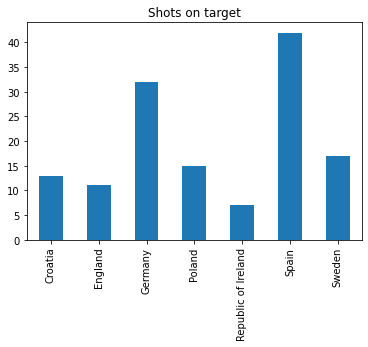

In [ ]:
'''стовпчикова діаграма кількості ударів в ціль команд, які використали від 16 до 18 гравців та мають точність удару більшу за 35%'''
%matplotlib inline
import matplotlib.pyplot as plt

x = data[(data["Players Used"] >= 16) & (data["Players Used"] <= 18) & (data["Shooting Accuracy"] >= 35)]["Shots on target"].rename(index=data.Team)
x.plot(kind='bar', title = "Shots on target")
plt.show()

Дослідити активність команд, показати топ 3 найактивніших слов'янських країн.

Припустимо, що активність пов'язана не тільки із кількістю жовтих та червоних карток, але і ще із кількістю Passes, Touches, Crosses, Dribbles, Corners Taken, Tackles, Clearances, Interceptions, Blocks.

Тоді, будь-яка дія зі сторони **і-тої команди** - прояв активності, що означає чим більше дій, тим більш **і-та команда** активна.

Метрика:
Activity = p + t + cr + d + ct + ts + cl + i + b, де
p - Passes,
t - Touches,
cr - Crosses,
d - Dribbles,
ct - Corners Taken,
ts - Tackles,
cl - Clearances,
i - Interceptions,
b - Blocks.


In [ ]:
slavic_countries = ['Czech Republic', 'Russia', 'Ukraine', 'Croatia']
data[data.Team.isin(slavic_countries)][['Passes', 'Touches', 'Crosses', 'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions', 'Blocks']].sum(axis=1, numeric_only=True).sort_values(ascending=False).rename(index=data.Team).head(3)

Czech Republic    4265
Russia            4186
Ukraine           3442
dtype: int64

Знайти сумарну кількість голів, забитих командами з літерою "а" в назві, кількістю жовтих карток <= 5, не більше ніж 1500 пасами, і відсотком по Goals-to-shots не менше 10%.

In [ ]:
data[(data.Team.str.lower().str.contains('a', regex=False)&(data['Yellow Cards'] <= 5)&(data.Passes <= 1500)&(data['% Goals-to-shots'].str[:-1].astype(float) >= 10.0))].Goals.sum()

9

Відфільтрувати команди по голах, взяти топ дві команди, групувати по колонках(команда, голи, агресія, пасив)

In [ ]:
data[['Team', 'Goals']].join((data['Passes']+data['Shots on target']+data['Dribbles']+data['Tackles']).rename('Activity')).join((data['Saves made']+data['Blocks']+data['Clearances']).rename('Passivity')).sort_values(by='Goals', ascending=False).head(2)

,Team,Goals,Activity,Passivity
13,Spain,12,4587,125
5,Germany,10,2957,94
